In [2]:
%set_env GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json

env: GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json


In [4]:
import DB_Control
from StockMarket.market import StockMarket

db = DB_Control.initialise_database()
stonks = StockMarket(db)

Inicializando módulo Firestore...
Credenciales validadas, inicializando cliente...
Cliente inicializado satisfactoriamente, conexión a Firebase exitosa!
	Inicializando submódulo StockMarket.market
	Módulo cargado con éxito


In [ ]:
for doc in stonks.stock_refs.values():
    docs = doc.collection("price_history").list_documents()
    for file in docs:
        file.delete()

In [3]:
from datetime import datetime
# Generar una hora de datos aleatorios
for sym, doc in stonks.stock_refs.items():
    for i in range(60):
        current, new, change = stonks.calculate_price_change(sym)
        stonks.price_to_history(sym, current, change)
        stonks.set_stock_price(sym, new)
        print(f"Price for {sym}: {new} ({round(change*100, 2)}% change)")
    
    history, tot_change = stonks.get_price_history(sym, 60)
    print(f"En este tiempo, {sym} cambió en {round(tot_change*100, 2)}%\n")
        

76966376 (-0.7% change)
Price for WMT: 135.81612317012443 (-0.2% change)
Price for WMT: 136.7668360323153 (0.7% change)
Price for WMT: 137.5874370485092 (0.6% change)
Price for WMT: 137.31226217441218 (-0.2% change)
Price for WMT: 137.31226217441218 (0.0% change)
Price for WMT: 136.4883886013657 (-0.6% change)
Price for WMT: 135.53296988115613 (-0.7% change)
Price for WMT: 134.7197720618692 (-0.6% change)
Price for WMT: 133.91145342949798 (-0.6% change)
Price for WMT: 133.10798470892098 (-0.6% change)
Price for WMT: 132.30933680066747 (-0.6% change)
Price for WMT: 131.64779011666414 (-0.5% change)
Price for WMT: 130.98955116608082 (-0.5% change)
Price for WMT: 131.6444989219112 (0.5% change)
Price for WMT: 132.43436591544267 (0.6% change)
Price for WMT: 131.63975971995 (-0.6% change)
Price for WMT: 131.37648020051012 (-0.2% change)
Price for WMT: 131.63923316091115 (0.2% change)
Price for WMT: 131.1126762282675 (-0.4% change)
Price for WMT: 130.58822552335442 (-0.4% change)
Price for W

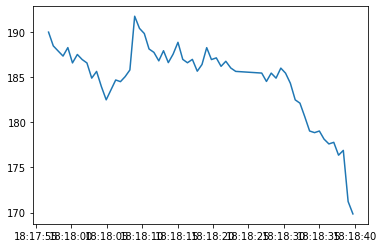

In [9]:
import matplotlib.pyplot as plt

history, change = stonks.get_price_history("DIS", 60)

prices = [doc.to_dict()["price"] for doc in history]
dates = [doc.to_dict()["timestamp"] for doc in history]

plt.plot(dates, prices)